In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize
from scipy.optimize import approx_fprime

from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping


import scipy.stats as sts

import random
import seaborn

from numpy.random import choice
from scipy.stats import *

import pylab as pl
import warnings
from scipy.spatial.distance import cosine

from scipy import linalg
from sklearn.decomposition import TruncatedSVD

warnings.filterwarnings("ignore")

from scipy.misc import derivative
from scipy.misc import electrocardiogram
from scipy.optimize import fmin, brute
from scipy.signal import find_peaks

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [88]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [89]:
result=[]
for j in range(len(raitings)):
    cosines=[]
    for i in  range(len(raitings)):
        cosines.append(cosine(raitings[j],raitings[i]))
    result.append([j, sorted(range(len(raitings)), key=lambda x:cosines[x])[1]])
result

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [90]:
svd = TruncatedSVD(5)
X_reduced = svd.fit_transform(raitings)
X_reduced 

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [91]:
def f(x):
    return np.tan((np.sin(x) + np.cos(2*x+3)))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [92]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [93]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [94]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

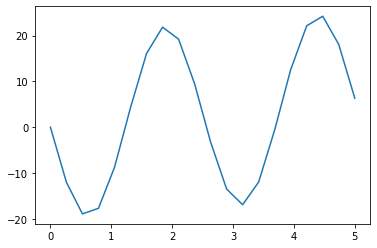

In [95]:
plt.plot(x, fx)
plt.show()

In [96]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [97]:
bounds = [(-5, 5), (-5, 5)]
differential_evolution(error, bounds).x

array([ 3. , -2.5])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

# задание на ЦПТ

In [98]:
probas = np.random.random(20)
probas = probas / probas.sum()
values = list(range(20))

values
sample = np.random.choice(values, size=(200,50), p=probas)
#среднее по каждой строке
means = sample.mean(axis=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

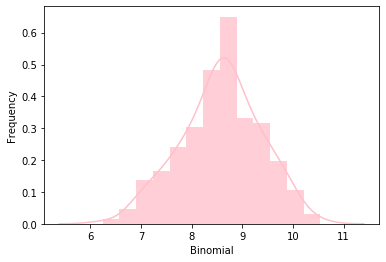

In [99]:
ax=seaborn.distplot(means,
                norm_hist=True,
                kde=True,
                color='pink',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [100]:
m = np.array([[1, 4],
              [1, 1]])
w1, v1 = np.linalg.eig(m)
print(m)
for i in range(len(w1)):
    print('Собственное значение '+ str(w1[i]))
    print('Соответствующий ему собственный вектор' + str(v1[i]))

[[1 4]
 [1 1]]
Собственное значение 3.0000000000000004
Соответствующий ему собственный вектор[ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
Соответствующий ему собственный вектор[0.4472136 0.4472136]
